In [1]:
import gymnasium as gym
import numpy as np
from collections import defaultdict

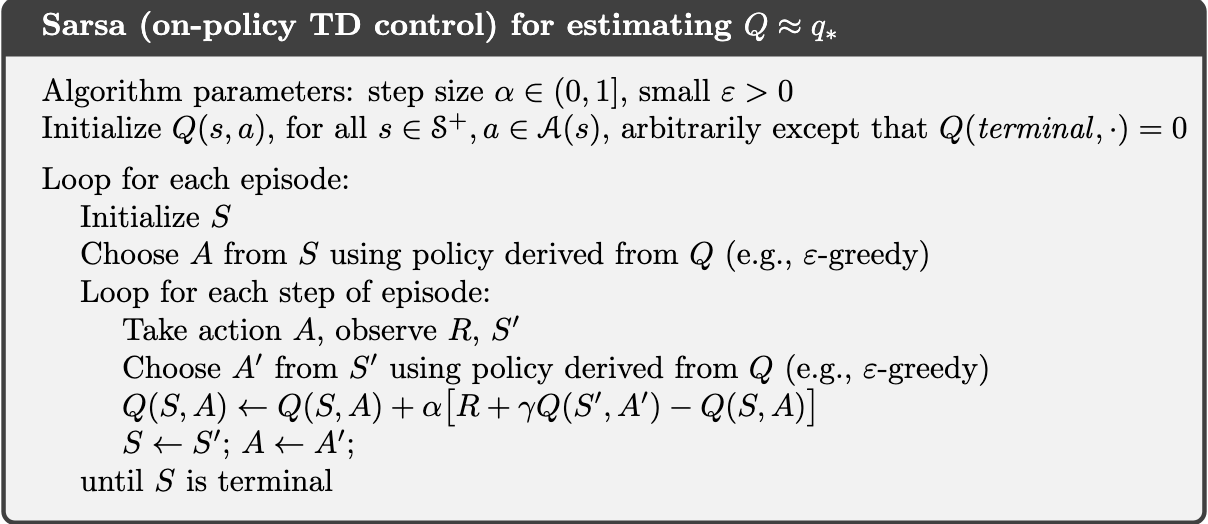

In [ ]:
def Sarsa_Control(env, epsilon=0.1, step_size=0.5, discount_factor=1.0, episodes=10000, max_t=None):
    nS = env.observation_space.n
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))

    for i in range(episodes):
        state, _ = env.reset()
        steps = 0

        #eps greedy for first state
        greedy = np.flatnonzero(Q[state] == Q[state].max())
        probs = np.ones(nA)/nA
        if len(greedy) != nA:
            probs[greedy] = (1.0-epsilon) / len(greedy)
            mask = np.ones(nA, dtype=bool)
            mask[greedy] = False
            probs[mask] = epsilon / mask.sum()
        action = np.random.choice(nA, p=probs)
        while(True):
            s_next, reward, term, trun, _ = env.step(action)
            steps+=1
            #get eps-greedy for next state
            greedy = np.flatnonzero(Q[s_next] == Q[s_next].max())
            probs = np.ones(nA)/nA
            if len(greedy) != nA:
                probs[greedy] = (1.0-epsilon) /len(greedy)
                mask = np.ones(nA, dtype=bool)
                mask[greedy] =  False
                probs[mask] = epsilon/mask.sum()
            next_action = np.random.choice(nA, p=probs)
            Q[state][action] += step_size * (reward + discount_factor*Q[s_next][next_action] - Q[state][action])
            state = s_next
            action = next_action
            if term or trun:
                break
            if max_t is not None and steps >= max_t:
                break
    
    return Q
            